# Class Exercises - Week 5

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.2 - 06/02/2025

---
---

**Reminder:** The solutions of some these exercises may be found online. Do not look for the solutions, but ask for help to me or the GTA. Your assessment will not have a solution available online so it is of paramount importance that you learn how to solve the problems without relying on a solution being available.

The solutions of these exercises will be discussed at the end of the session. Moreover, the complete solution will be provided to you after 1 week.  **N.B.** **Do not share the solutions online**

## Exercise 1

A common approximation problem consists in fitting a series of measurements using a specific class of functions. For instance, one can look for the best linear interpolator or the best polynomial interpolator. A popular class of interpolators is the class of rational functions, i.e. functions which are the ratio of two polynomials. For instance, this is the case in control engineering, where the measurements are sampled values of the transfer function, called "moments", and we aim at obtaining the best transfer function that matches the sampled moments. Of course, transfer functions are rational functions.

Consider the following **quasiconvex** optimisation problem:
$$
\begin{array}{ll}
\min & \displaystyle \max_{i=1,\dots,k} \left| \frac{p(t_i)}{q(t_i)}-y_i\right|
\end{array} \tag{1}
$$
with
$$
p(t) = a_0 + a_1 t + a_2 t^2 + \cdots + a_m t^m, \qquad q(t) = 1 + b_1t + \cdots + b_n t^n,
$$
where the domain of the objective function is
$$
D = \{(a,b)\in \mathbb{R}^{m+1}\times \mathbb{R}^n : q(t) > 0, \,\,\alpha \le t \le \beta \}.
$$
In this problem we fit a rational function $p(t)/q(t)$ to given data $y$, while constraining the polynomial denominator to be positive in the interval $[\alpha,\beta]$. The optimisation variables are the numerator and denominator coefficients $a_i$ and $b_i$.

Here, we consider the specific problem instance with data

$$
t_i = -3 + 6\frac{i-1}{k-1}, \quad y_i = e^{t_i}, \quad i=1,\dots,k, \tag{2}
$$

where $k=201$. In other words, the data are obtained by uniformly sampling the exponential function over the interval $[-3,3]$.

For this exercise you will find useful Sub-Section "*Representation via a family of convex functions*" in 4.3.1 and
Sub-Section "*Special case: Quasiconvex Optimisation*" in 5.1.1.

*    Transform problem $(1)$ into a convex feasibility problem. (*NB: you do not have to prove that the convex representation is convex. The proof is postponed to Exercise $2$*).
*    Solve problem $(1)$ for $m=2$ and $n=2$, with a bisection tolerance of $0.001$ (as upper bound you can pick $e^3$).
*    Plot, in the same figure, the exponential in $(2)$ with a solid line and the rational approximation obtained with the optimal $a_0$, $a_1$, $a_2$, $b_1$ and $b_2$ with a dashed line.

1. convex feasibility problem 

$$
\begin{array}{lll}
\text{find} & x &\\
s.t. & \phi_t(x) \le 0 & \\
& f_i(x) \le 0, & i = 1,\dots,m\\
& a_i^\top x = b_i,  & i = 1,\dots,p
\end{array}
$$

$$
\phi = |p(r_i) - y_iq(r_i) | - \gamma q(r_i) \leq 0 
$$ 

2. with $m = 2 ; \; n = 2$

$$
p(t) = a_0 + a_1 t + a_2 t^2, \qquad q(t) = 1 + b_1t + b_2t^2,
$$

C:\Users\amor_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


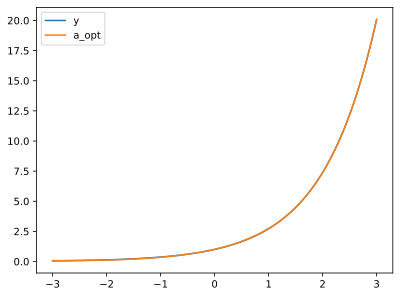

In [12]:
import cvxpy as cp
import numpy as np

# data 
k = 201
t = np.linspace(-3, 3, k) 
y = np.exp(t)
tolerence = 0.001

# variables
a0 = cp.Variable()
a1 = cp.Variable()
a2 = cp.Variable()
b1 = cp.Variable()
b2 = cp.Variable()

l = 0
u = np.exp(3)   #???

while u - l > tolerence:
    gamma = (l + u)/2
    
    constraints = []
    for i in range(k):
        ti = t[i]
        yi = y[i]
        p = a0 + a1*ti + a2*(ti**2)
        q = 1 + b1*ti + b2*(ti**2)
        constraints.append(cp.abs(p - yi*q) <= gamma*q)

    prob = cp.Problem(cp.Minimize(0), constraints)
    prob.solve()

    if prob.status == 'optimal':
        u = gamma
        a_opt = np.array([a0.value, a1.value, a2.value])
        b_opt = np.array([b1.value, b2.value])
    else:
        l = gamma

# plot
import matplotlib.pyplot as plt
plt.plot(t, y, label='y')
plt.plot(t, (a_opt[0] + a_opt[1]*t + a_opt[2]*t**2) / (1 + b_opt[0] * t + b_opt[1]* t ** 2), label='a_opt')
plt.legend()
plt.show()


## Exercise 2

Prove that the problem in Exercise $1$ is a quasiconvex optimisation problem. To this end:

*   Show that the domain $D$ is convex.
*   Find a convex representation $\phi_\gamma$ of the sublevel sets of the objective function. Show that $\phi_\gamma$ is convex.


### Hint

The important fact to notice is that the polynomials $p(t)$ and $q(t)$ are **linear** functions in the parameters $a_i$ and $b_i$.

## Exercise 3

In general the product or ratio of two convex functions is not convex. However, there are some results that apply to functions on $\mathbb{R}$.

Prove the following:
1.   If $f$ and $g$ are convex, both nondecreasing (or nonincreasing), and positive functions on an interval, then $fg$ is convex. (*Hint: use Jensen's inequality*)
2.   If $f$, $g$ are concave, positive, with one nondecreasing and the other nonincreasing,
then $fg$ is concave.
3.   If $f$ is convex, nondecreasing, and positive, and $g$ is concave, nonincreasing, and
positive, then $f/g$ is convex.